<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_05_06_ZerosFunciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 5
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

1. Implementar el metodo de la bisección para determinar las raices de una función.
2. Implementar el metodo de la newton para determinar las raices de una función.

Prueba tu resultado para:


  
 2. $a e^{x}-2= b\cos(e^x-2)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

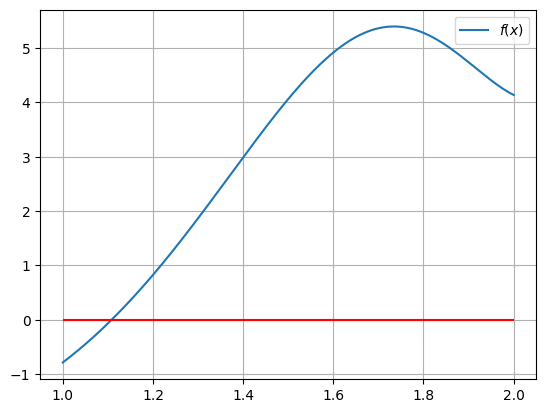

In [10]:
f=lambda x,a,b: a*np.exp(x)-2-b*np.cos(np.exp(x)-2)
x=np.linspace(1,2,1000)

plt.plot(x,f(x,1,2),label='$f(x)$')
plt.grid()
plt.legend()
plt.hlines(0,1,2,'r')

# Método de bisección

In [18]:
#rudimentario
f=lambda x,a,b: a*np.exp(x)-2-b*np.cos(np.exp(x)-2)

def bis(f,a,b,eps,n):       #los (1,2) de f son por como definí la función

    if f(a,1,2)*f(b,1,2)>0:
        return 'Seleccione otro intervalo.'

    elif f(a,1,2)*f(b,1,2)<0:
        for i in range(n):
            pm=(a+b)/2

            if abs(f(pm,1,2))<eps:
                return pm
            elif f(a,1,2)*f(pm,1,2)<0:
                b=pm
            else:
                a=pm
    return (a+b)/2

bis(f,1,2,1e-15,100)

1.1085185688224326

In [19]:
#solo depende de eps
f=lambda x,a,b: a*np.exp(x)-2-b*np.cos(np.exp(x)-2)

def bisec(f,a,b,eps):           #los (1,2) de f son por como definí la función

    if f(a,1,2)*f(b,1,2)>0:
        return 'Seleccione otro intervalo.'
    n=0
    while abs(b-a)>eps:
        n+=1
        pm=(a+b)/2
        c=f(pm,1,2)
        if f(a,1,2)*f(pm,1,2)<0:
            b=pm
        else:
            a=pm
    return f'raíz x={pm} encontrada en {n} iteraciones.'

bisec(f,1,2,1e-15)

'raíz x=1.108518568822432 encontrada en 50 iteraciones.'

# Método de Newton-Raphson

In [20]:
#rudimentario
f=lambda x,a,b: a*np.exp(x)-2-b*np.cos(np.exp(x)-2)
df=lambda x,a,b: np.exp(x)*(a+b*np.sin(np.exp(x)-2)*np.exp(x))

eps=1e-4
n=100
xi=2
def newton(f,df,eps,n,xi):      #los (1,2) de f son por como definí la función
    for i in range(n):
        if abs(f(xi,1,2))<=eps:
            return f'x={xi} es un cero de la función'
            break
        else:
            xn=xi-(f(xi,1,2))/(df(xi,1,2))
            xi=xn

newton(f,df,eps,n,xi)

'x=1.1085290389561575 es un cero de la función'

In [21]:
#solo depende de eps
f=lambda x,a,b: a*np.exp(x)-2-b*np.cos(np.exp(x)-2)
df=lambda x,a,b: np.exp(x)*(a+b*np.sin(np.exp(x)-2)*np.exp(x))

eps=1e-4
xi=2
def newt(f,df,eps,xi):      #los (1,2) de f son por como definí la función
    n=0
    while abs(f(xi,1,2))>eps:
        n+=1
        xn=xi-(f(xi,1,2))/(df(xi,1,2))
        xi=xn
    return f'raíz encontrada x={xi} en {n} iteraciones.'
newt(f,df,eps,xi)

'raíz encontrada x=1.1085290389561575 en 82 iteraciones.'